In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/glass.csv')
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [ ]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:9], df.iloc[:,-1], test_size=.2)

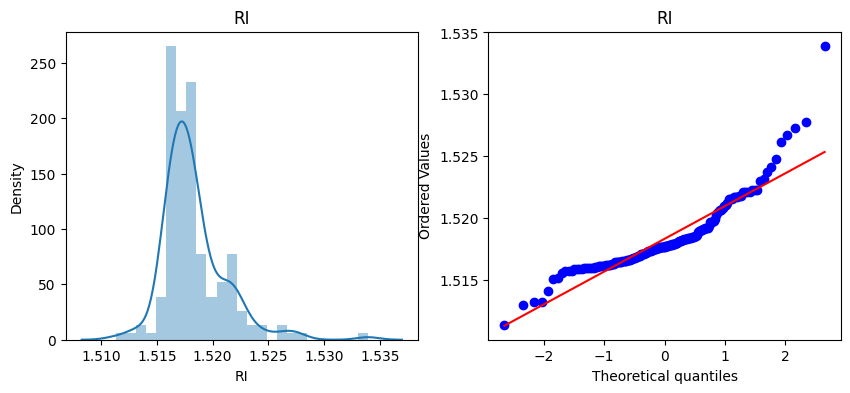

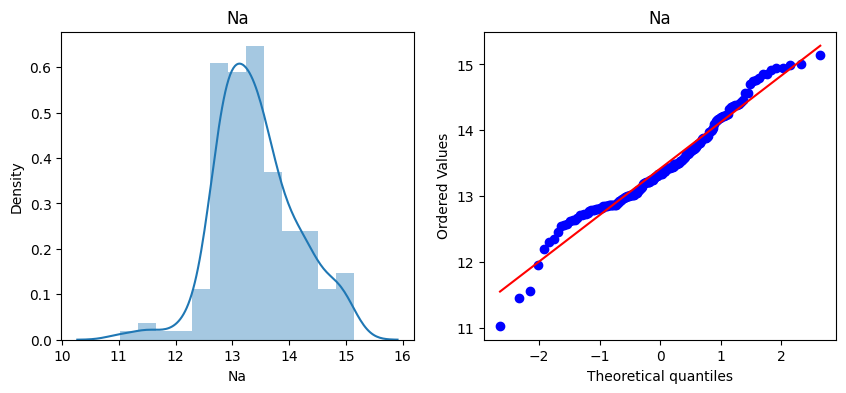

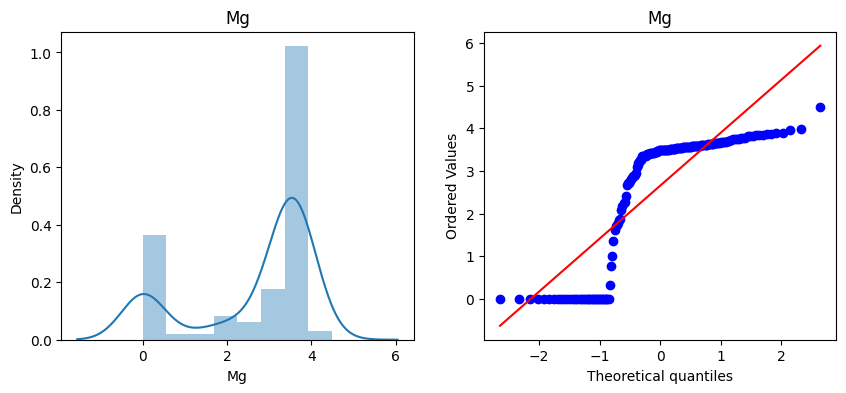

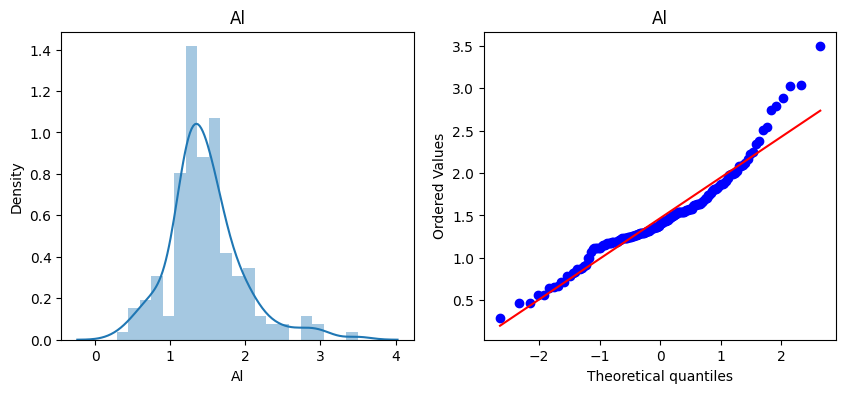

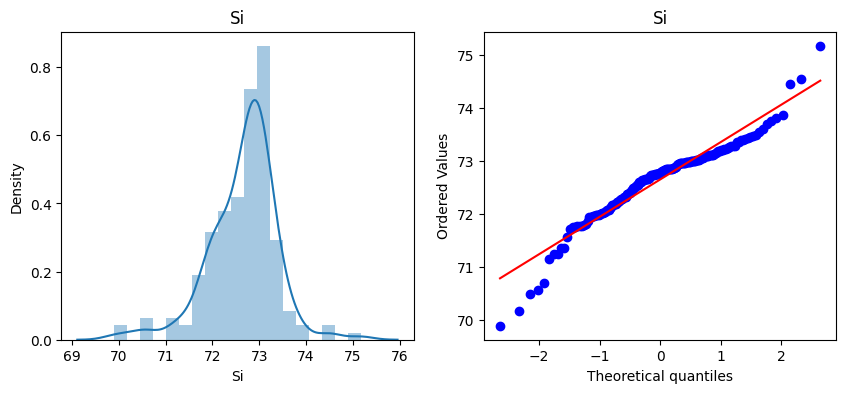

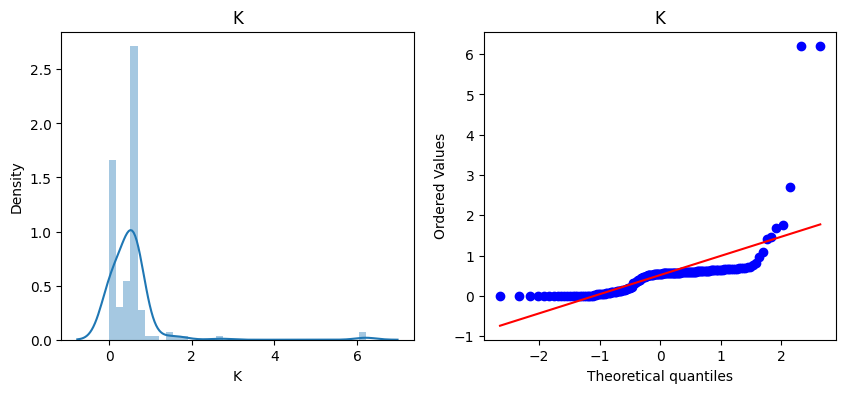

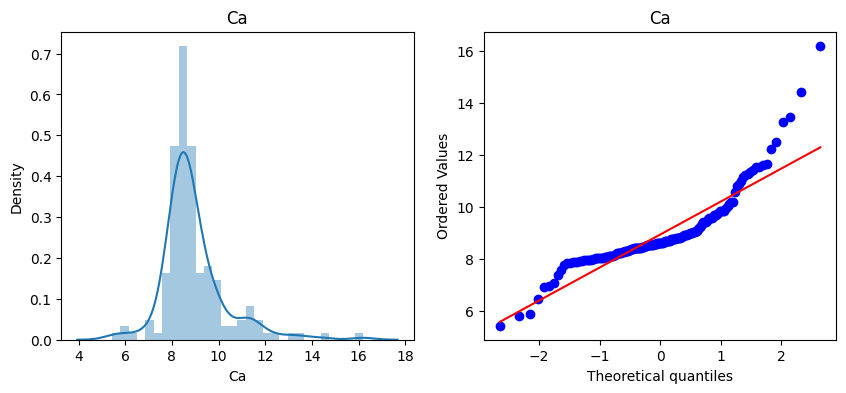

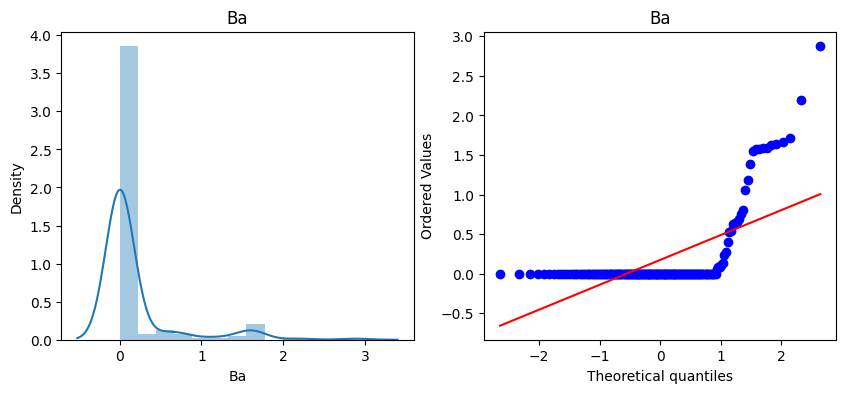

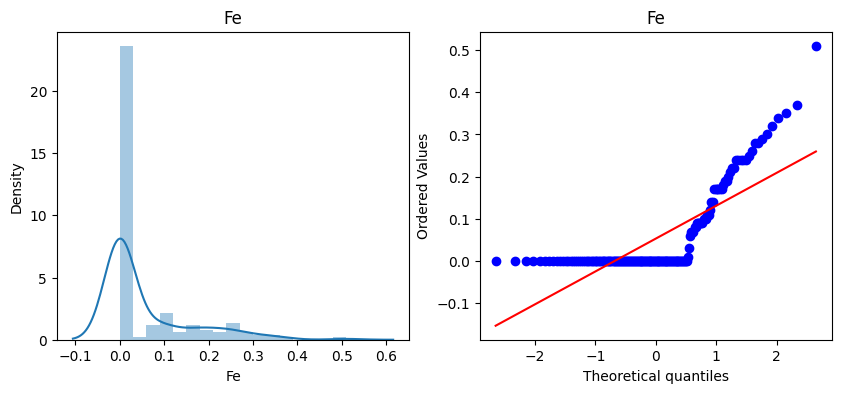

In [ ]:
for col in X_train.keys():
  plt.figure(figsize=(10,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train[col],dist='norm',plot=plt)
  plt.title(col)
plt.show()

In [ ]:
lr = LogisticRegression()
rft = RandomForestClassifier()

In [ ]:
lr.fit(X_train,y_train)
rft.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
print('Accuracy lr :',cross_val_score(lr,X_train,y_train,cv=10).mean())
print('Accuracy rft :',cross_val_score(rft,X_train,y_train,cv=10).mean())

Accuracy lr : 0.619281045751634
Accuracy rft : 0.7660130718954248


In [ ]:
pt = PowerTransformer(method='box-cox')
X_train_trans = pt.fit_transform(X_train+.00001)
X_test_trans = pt.transform(X_test+.00001)

In [ ]:
lr.fit(X_train_trans,y_train)
rft.fit(X_train_trans,y_train)

RandomForestClassifier()

In [ ]:
print('Accuracy lr :',cross_val_score(lr,X_train_trans,y_train,cv=10).mean())
print('Accuracy rft :',cross_val_score(rft,X_train_trans,y_train,cv=10).mean())

Accuracy lr : 0.6784313725490196
Accuracy rft : 0.7189542483660132


In [ ]:
pt1 = PowerTransformer()
X_train_trans2 = pt1.fit_transform(X_train)
X_test_trans2 = pt1.transform(X_test)

In [ ]:
lr.fit(X_train_trans2,y_train)
rft.fit(X_train_trans2,y_train)

RandomForestClassifier()

In [ ]:
print('Accuracy lr :',cross_val_score(LogisticRegression(),X_train_trans2,y_train,cv=10).mean())
print('Accuracy rft :',cross_val_score(RandomForestClassifier(),X_train_trans2,y_train,cv=10).mean())

Accuracy lr : 0.6434640522875817
Accuracy rft : 0.754248366013072


In [ ]:
X_train_trans2_df = pd.DataFrame(X_train_trans2,columns=X_train.keys())

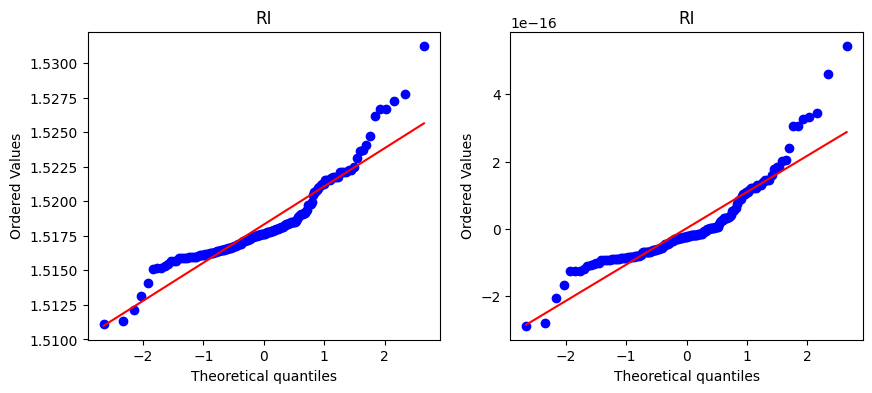

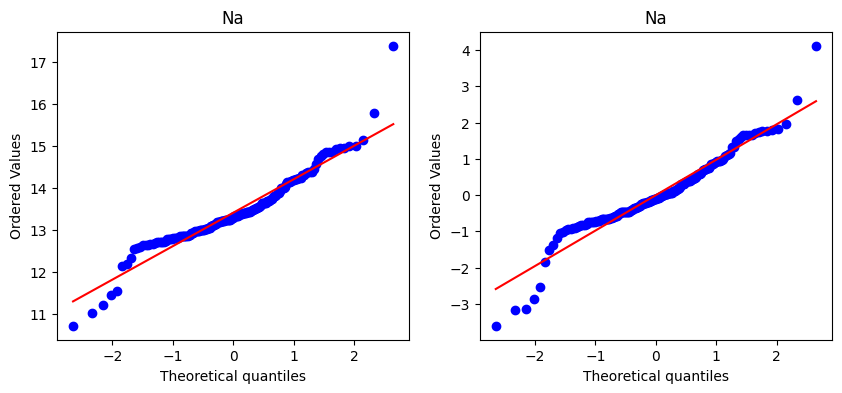

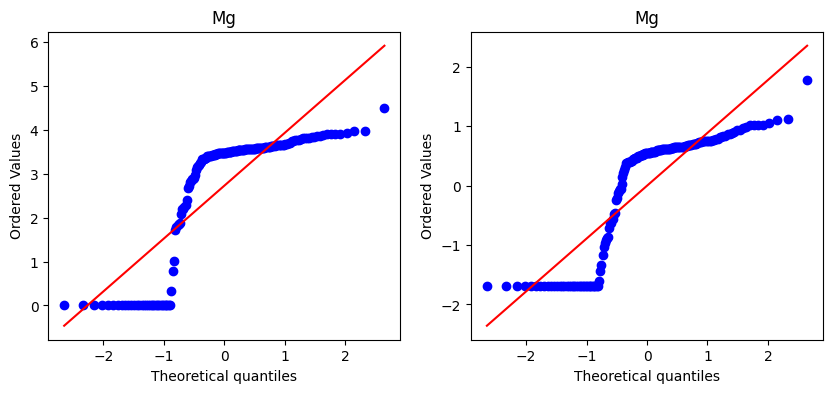

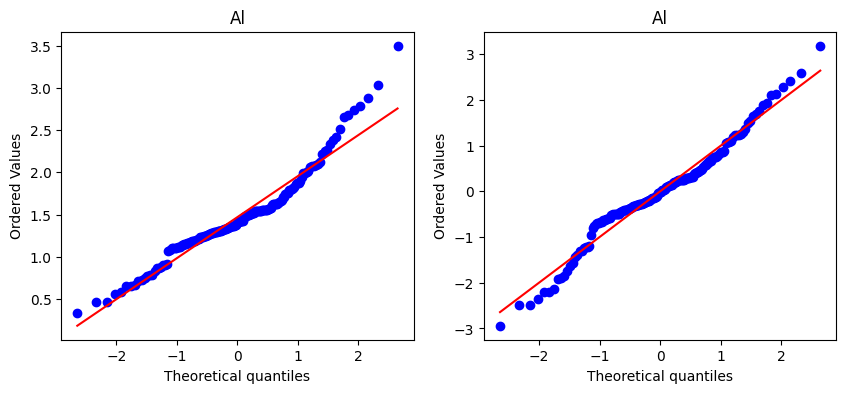

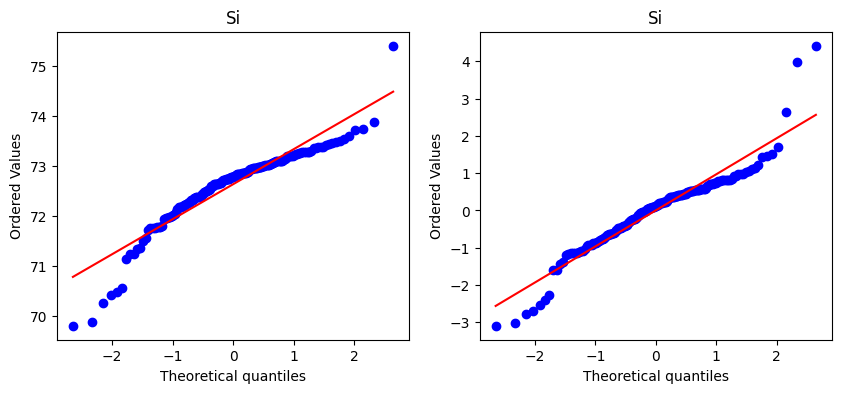

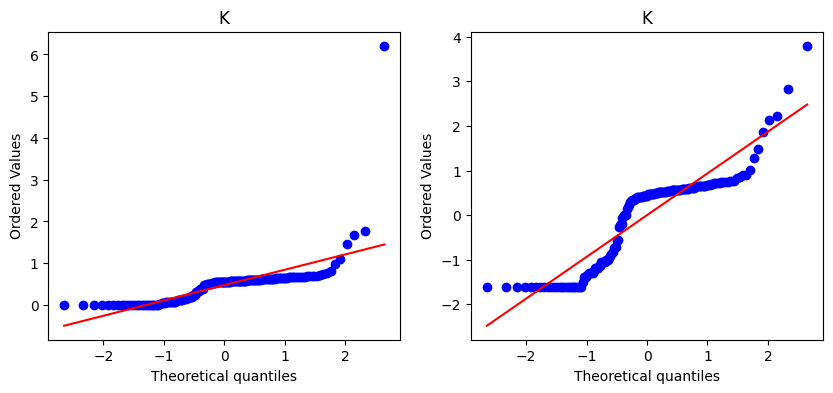

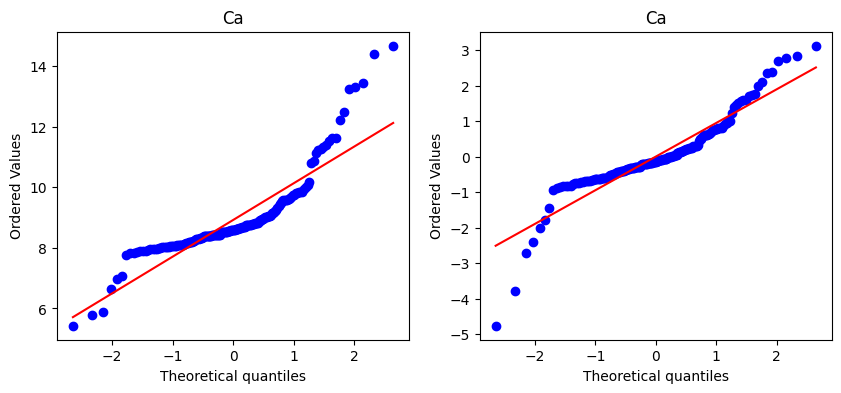

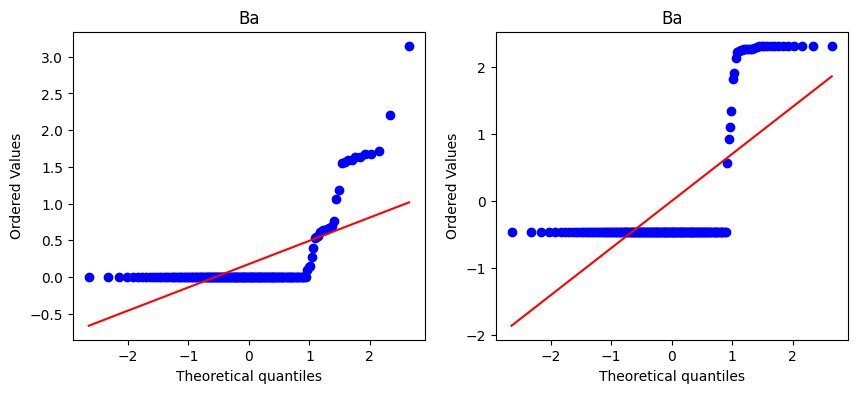

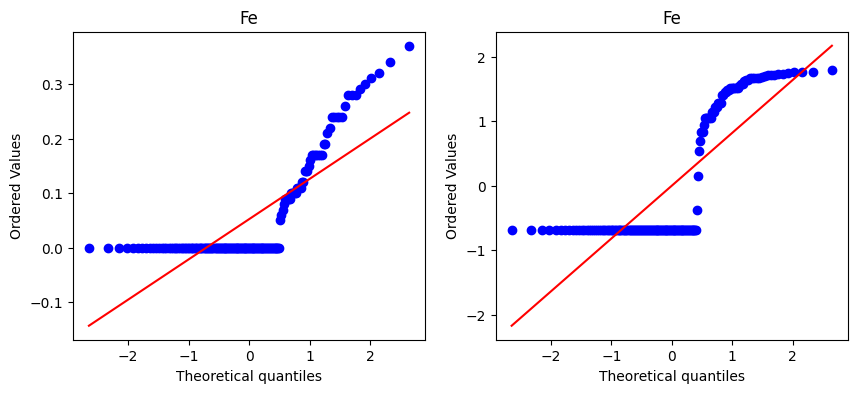

In [ ]:
for col in X_train.keys():
  plt.figure(figsize=(10,4))
  plt.subplot(121)
  stats.probplot(X_train[col],dist='norm',plot=plt)
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train_trans2_df[col],dist='norm',plot=plt)
  plt.title(col)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('/content/LuxuryLoanPortfolio.csv',usecols=['funded_amount', 'duration years', 'duration months',
       '10 yr treasury index date funded', 'interest rate percent',
       'interest rate', 'payments', 'total past payments', 'loan balance',
       'property value', 'employment length', 'ZIP CODE', 'TOTAL UNITS',
       'TAX CLASS AT TIME OF SALE'])
df.head(4)

funded_amount  duration years  duration months  \
0       790000.0              20              240   
1      1720000.0              15              180   
2      3720000.0              15              180   
3      1079000.0              20              240   

   10 yr treasury index date funded  interest rate percent  interest rate  \
0                              1.96                  3.359        0.03359   
1                              2.21                  3.508        0.03508   
2                              2.60                  3.896        0.03896   
3                              1.99                  3.389        0.03389   

   payments  total past payments  loan balance  property value  \
0   4524.65                   92     373732.18        930250.0   
1  12302.74                   62     957230.24       1995250.0   
2  27322.92                   66    1916687.35       3881700.0   
3   6196.40                   94     496538.75       1402450.0   

   employment length  ZIP CODE  TOTAL UNITS  TAX CLASS AT TIME OF SALE  
0                  6     10001            1                          2  
1                 10     10104            1                          1  
2                  1     10029            1                          1  
3                 17     10010            1                          2

In [ ]:
df.describe().keys()

Index(['funded_amount', 'duration years', 'duration months',
       '10 yr treasury index date funded', 'interest rate percent',
       'interest rate', 'payments', 'total past payments', 'loan balance',
       'property value', 'employment length', 'ZIP CODE', 'TOTAL UNITS',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['loan balance']), df['loan balance'], test_size=.2)

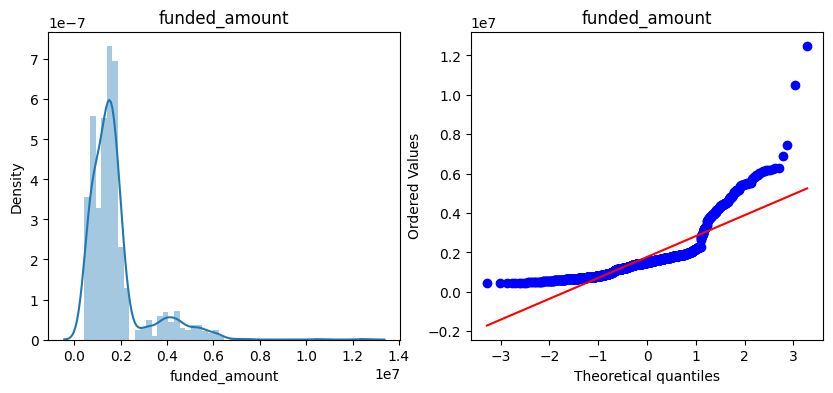

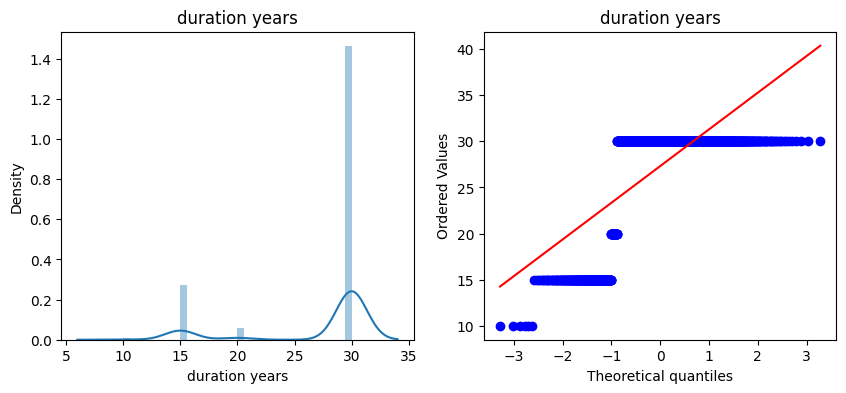

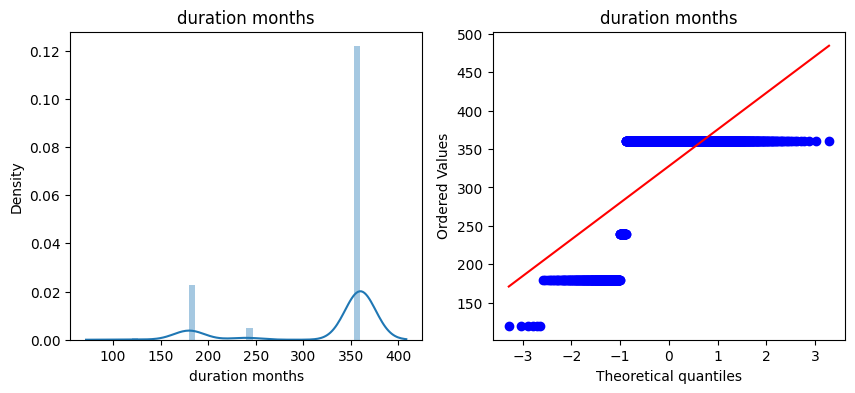

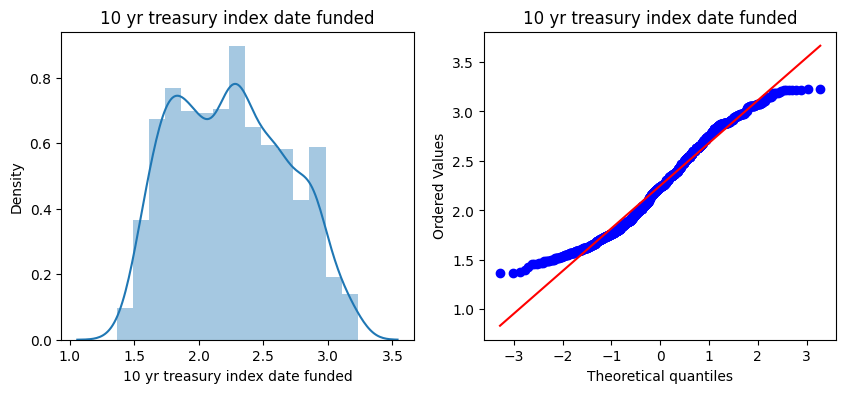

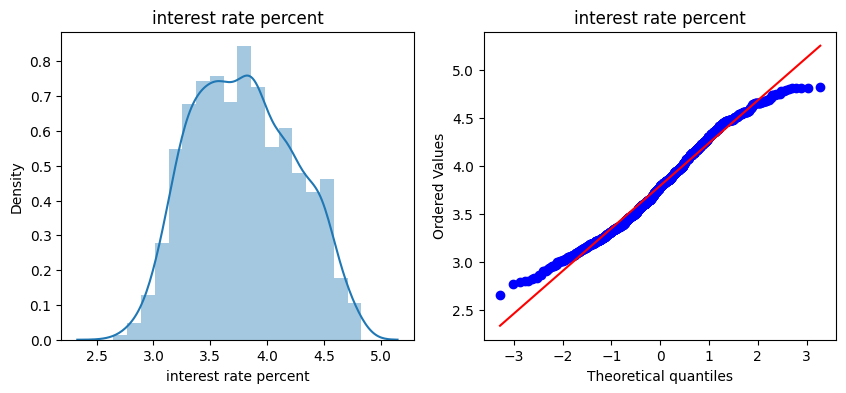

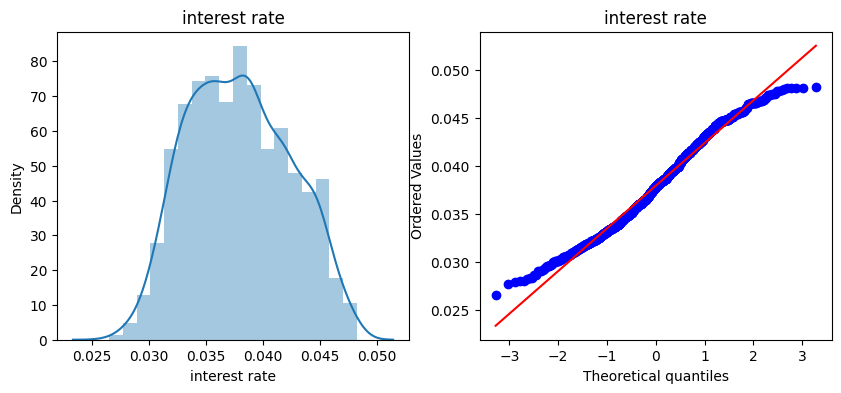

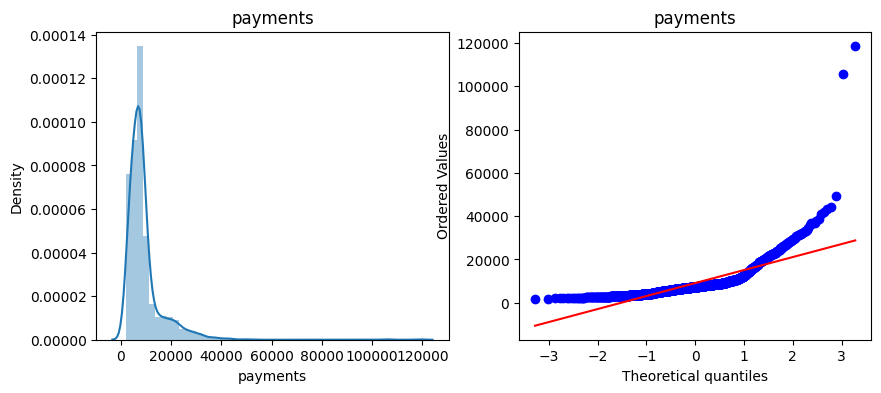

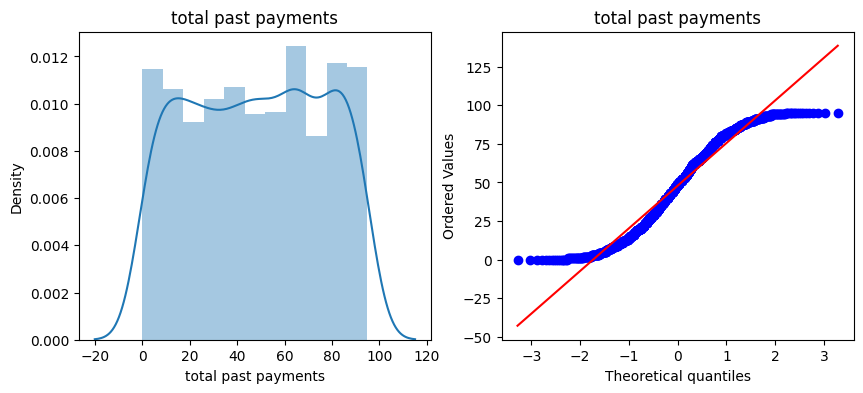

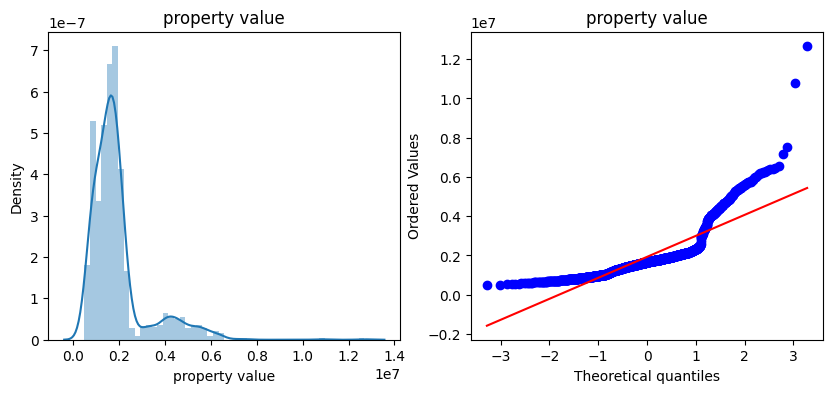

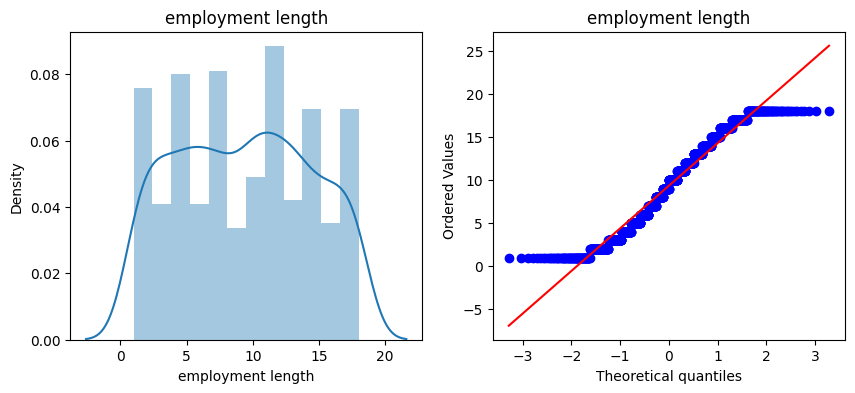

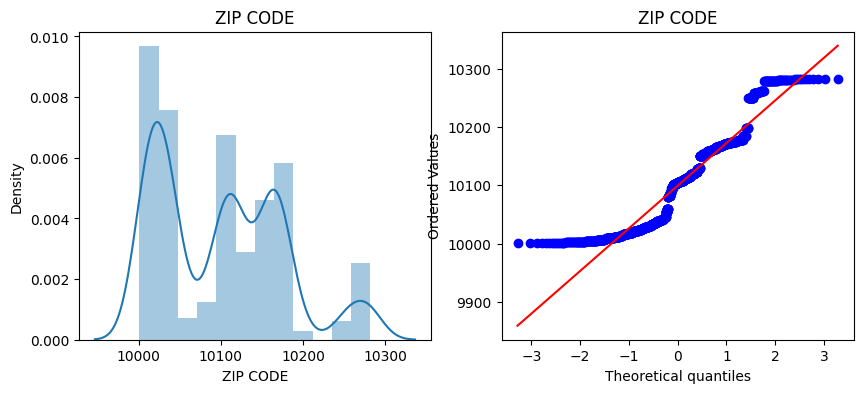

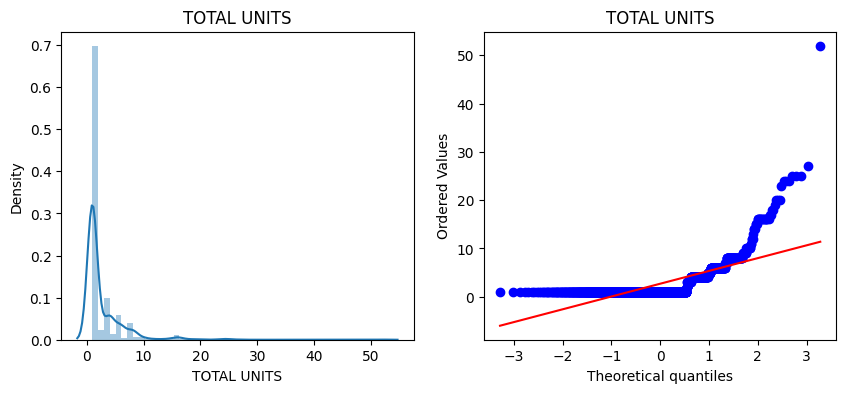

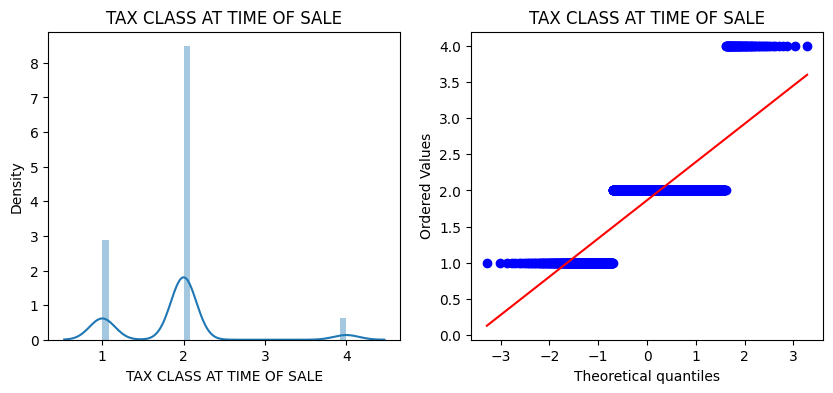

In [ ]:
for i in (X_train.keys()):
  plt.figure(figsize=(10,4))
  plt.subplot(121)
  sns.distplot(X_train[i])
  plt.title(i)

  plt.subplot(122)
  stats.probplot(X_train[i],dist='norm',plot=plt)
  plt.title(i)
plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Accuracy :',cross_val_score(lr,X_test,y_test).mean())

Accuracy : 0.9683727880561296


In [100]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [109]:
df = pd.read_csv('/content/test.csv')
df.head(4)

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  

[4 rows x 21 columns]

In [110]:
df.drop('id',axis=1,inplace=True)

In [111]:
df_key = X_train.keys()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=.2)

In [113]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [114]:
X_train = pd.DataFrame(X_train,columns=df_key)
X_test = pd.DataFrame(X_test,columns=df_key)

In [115]:
lr = LogisticRegression()
rft = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [116]:
lr.fit(X_train,y_train)
rft.fit(X_train,y_train)
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [117]:
print('Accuracy lr :',cross_val_score(lr,X_test,y_test).mean())
print('Accuracy rft :',cross_val_score(rft,X_test,y_test).mean())
print('Accuracy dt :',cross_val_score(dt,X_test,y_test).mean())
print('Accuracy knn :',cross_val_score(knn,X_test,y_test).mean())

Accuracy lr : 0.575
Accuracy rft : 0.5399999999999999
Accuracy dt : 0.515
Accuracy knn : 0.5000000000000001


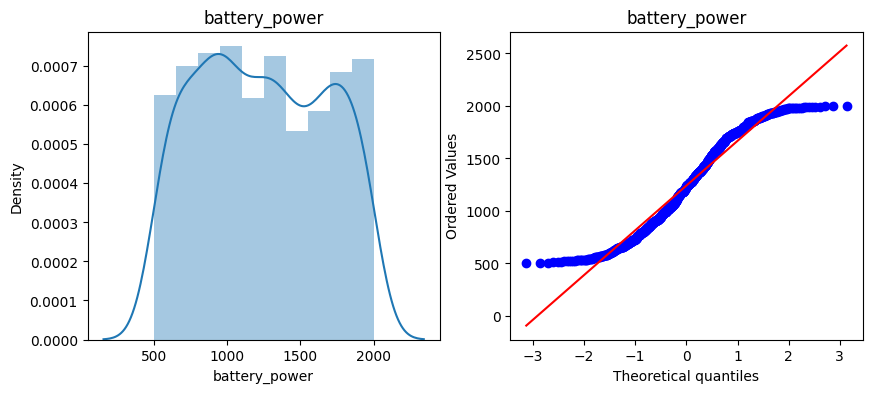

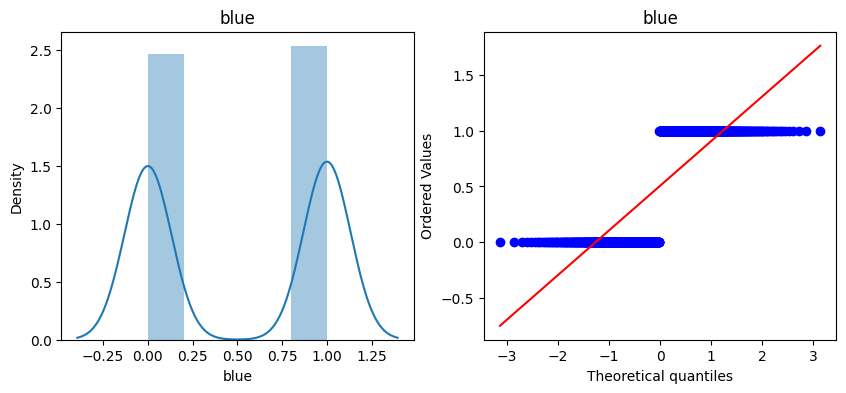

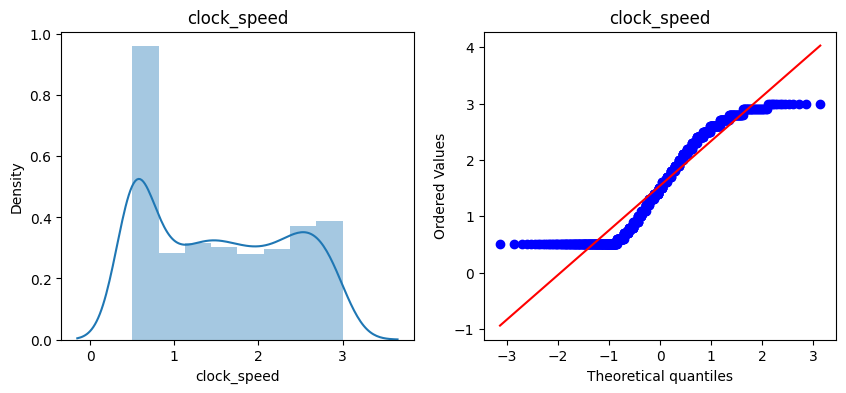

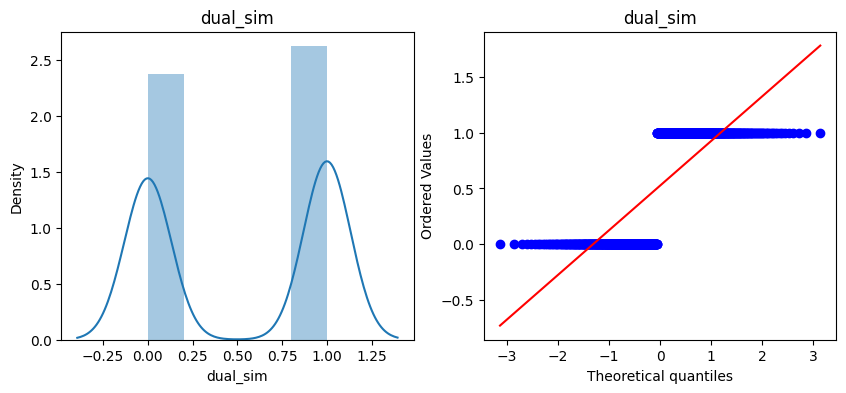

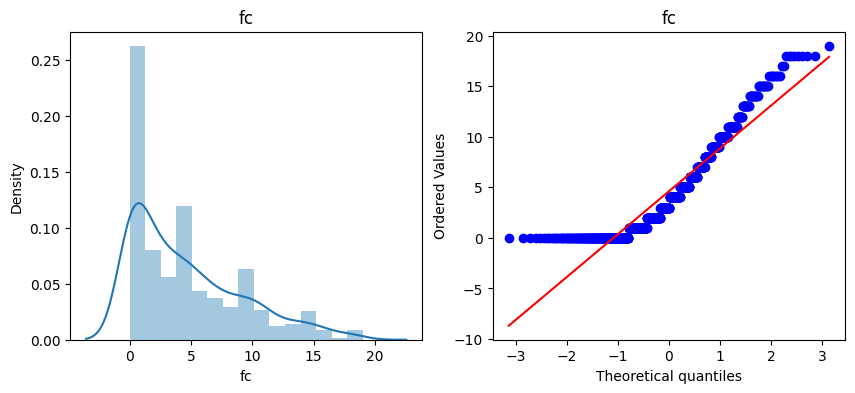

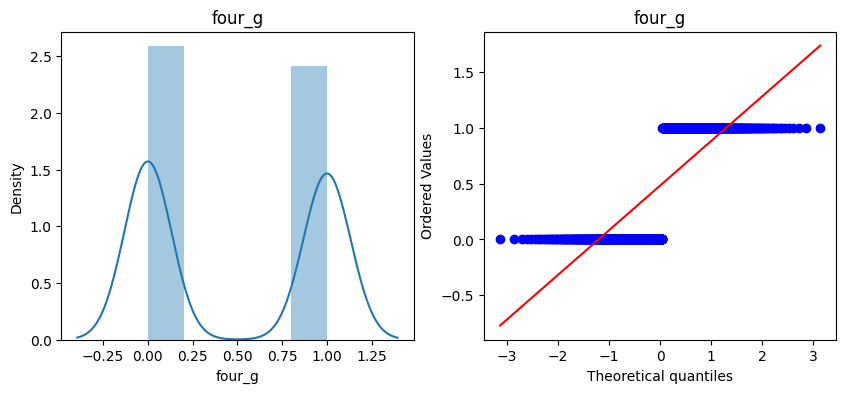

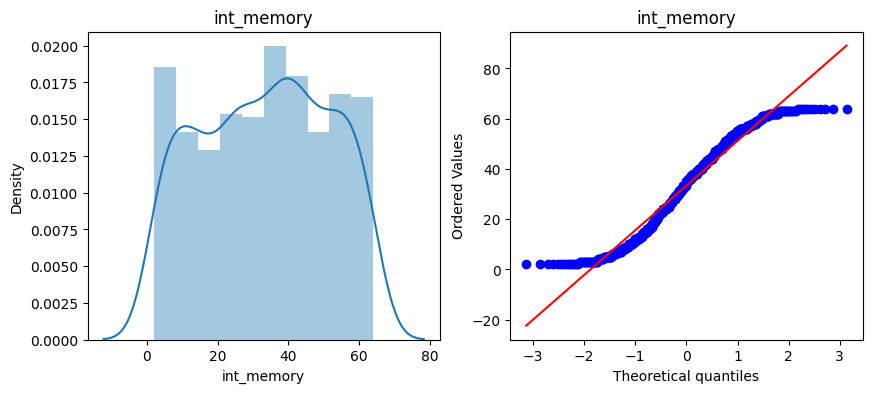

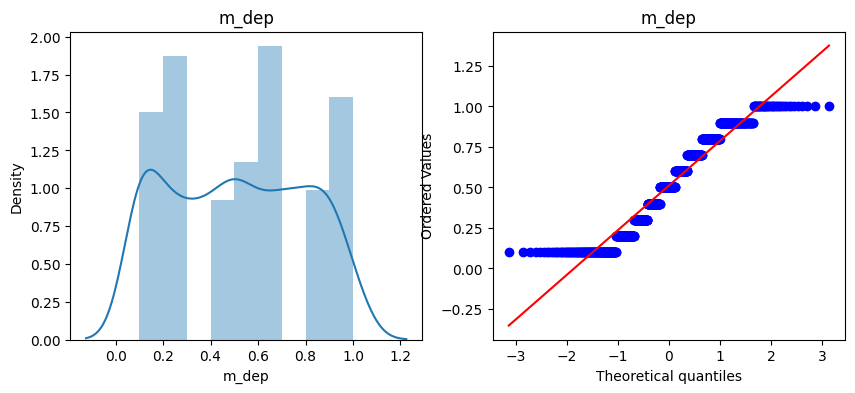

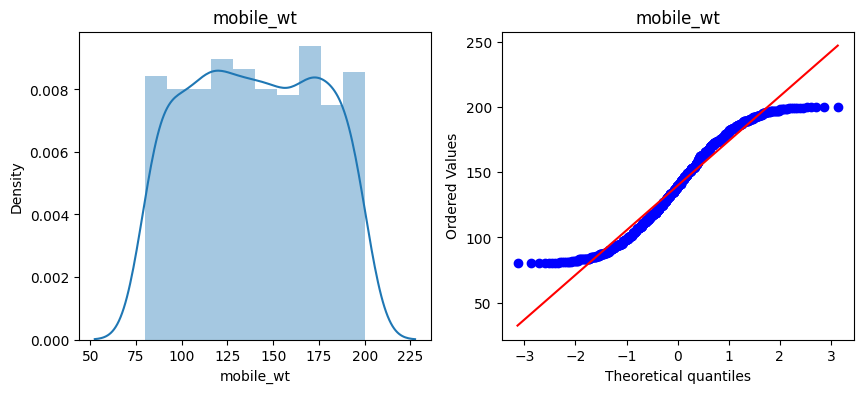

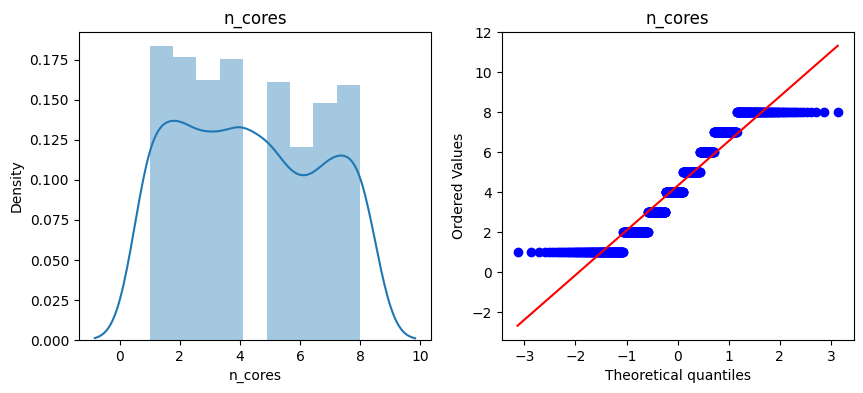

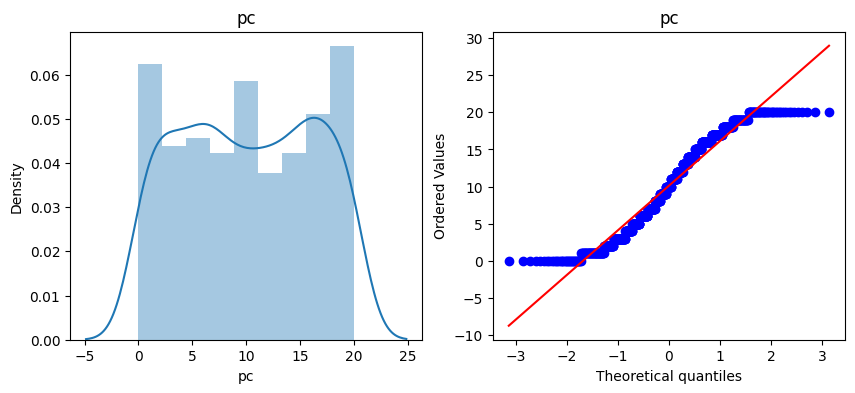

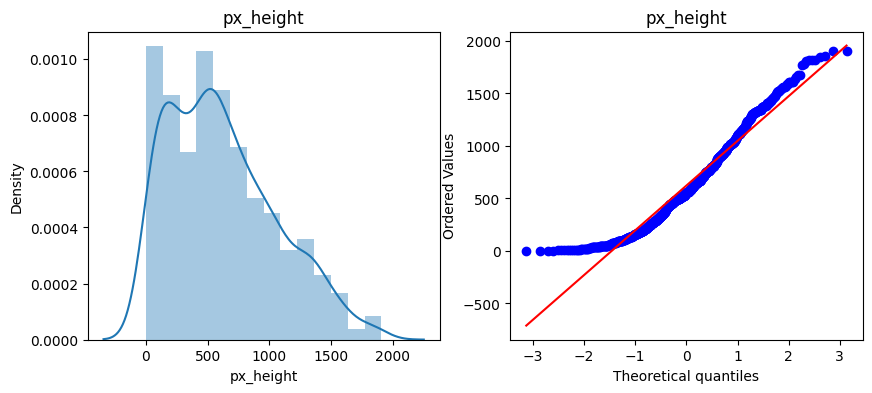

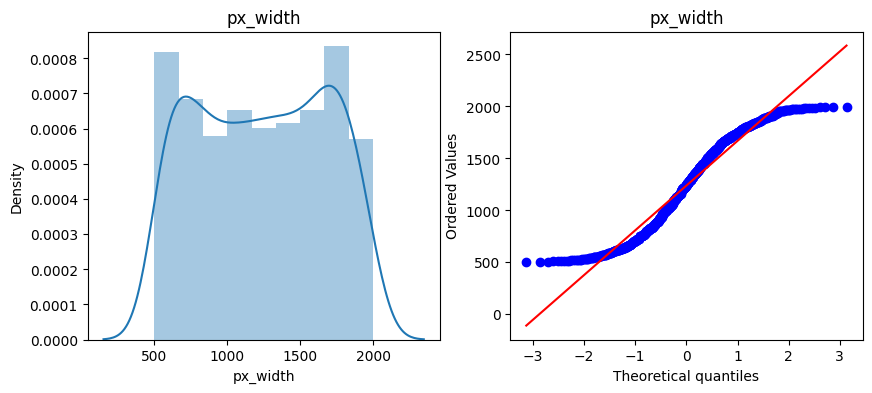

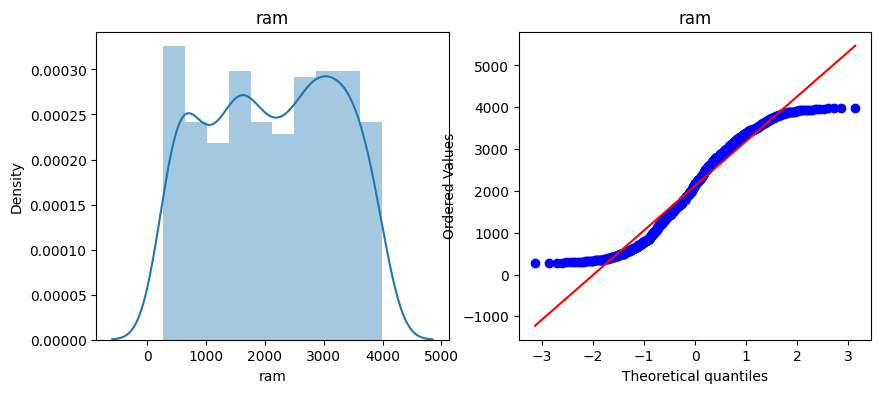

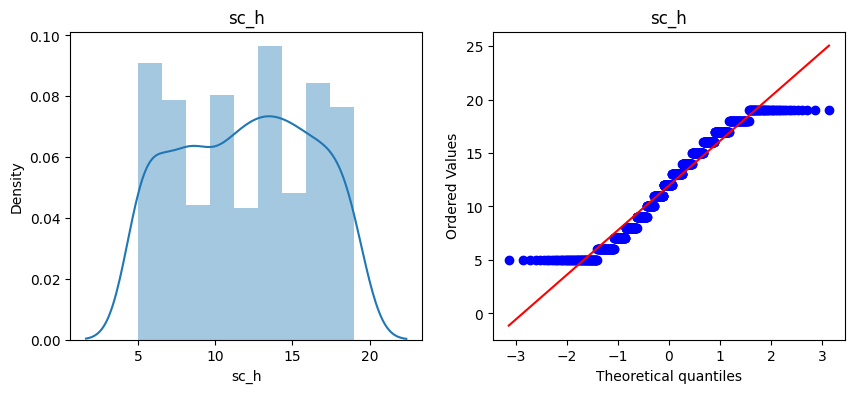

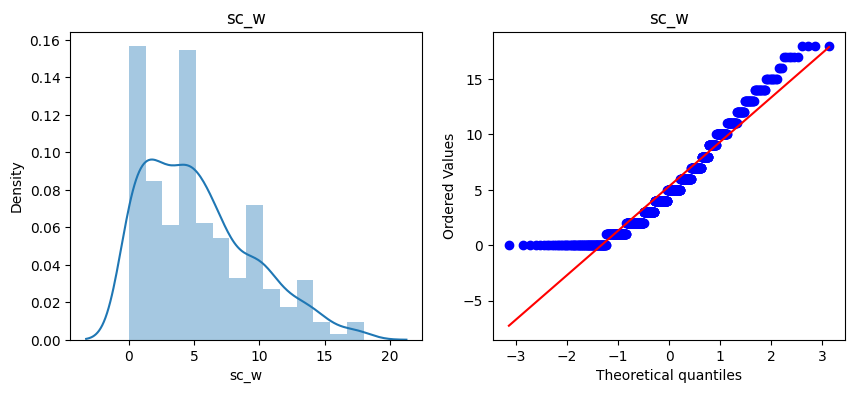

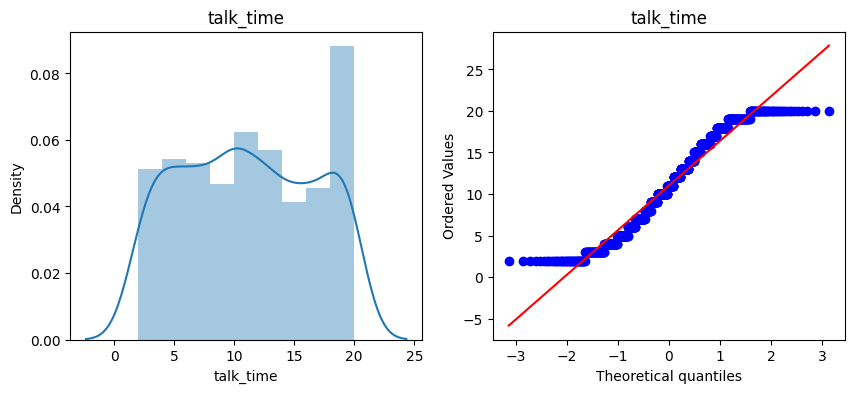

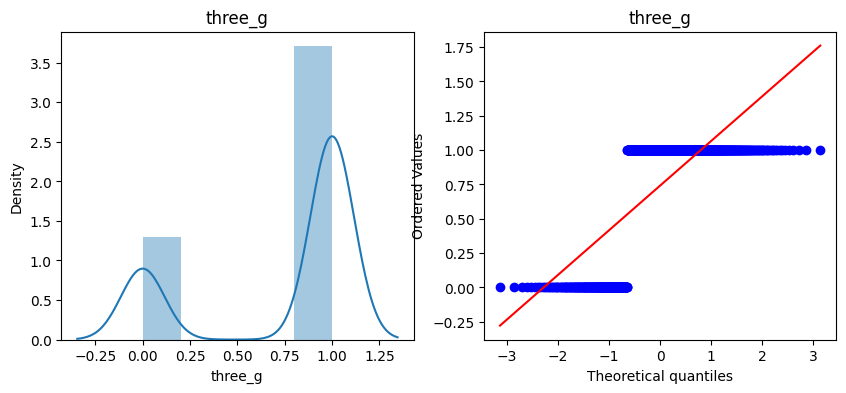

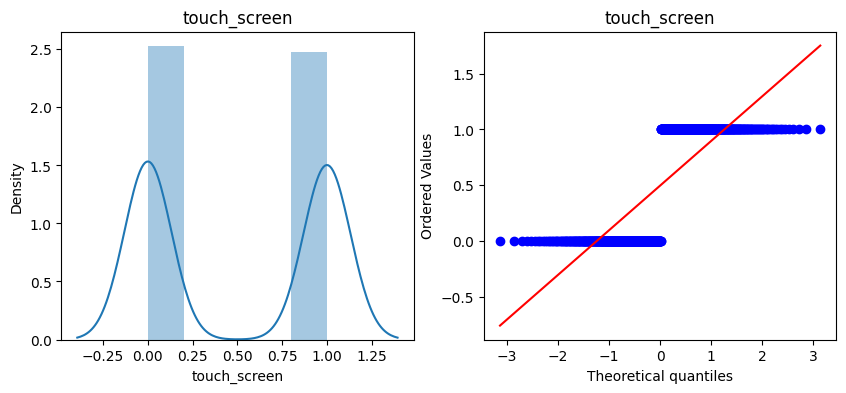

In [19]:
for col in X_train.keys():
  plt.figure(figsize=(10,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train[col],dist='norm',plot=plt)
  plt.title(col)
plt.show()

In [118]:
pt = PowerTransformer(method='box-cox')
X_train_trans = pt.fit_transform(X_train+.00001)
X_test_trans = pt.transform(X_test+.00001)

In [119]:
lr.fit(X_train_trans,y_train)
rft.fit(X_train_trans,y_train)
dt.fit(X_train_trans,y_train)
knn.fit(X_train_trans,y_train)

KNeighborsClassifier()

In [120]:
print('Accuracy lr :',cross_val_score(lr,X_test_trans,y_test).mean())
print('Accuracy rft :',cross_val_score(rft,X_test_trans,y_test).mean())
print('Accuracy dt :',cross_val_score(dt,X_test_trans,y_test).mean())
print('Accuracy knn :',cross_val_score(knn,X_test_trans,y_test).mean())

Accuracy lr : 0.57
Accuracy rft : 0.535
Accuracy dt : 0.53
Accuracy knn : 0.4950000000000001


In [30]:
X_train_trans_df = pd.DataFrame(X_train_trans,columns=X_train.keys())
X_test_trans_df = pd.DataFrame(X_test_trans, columns=X_train.keys())

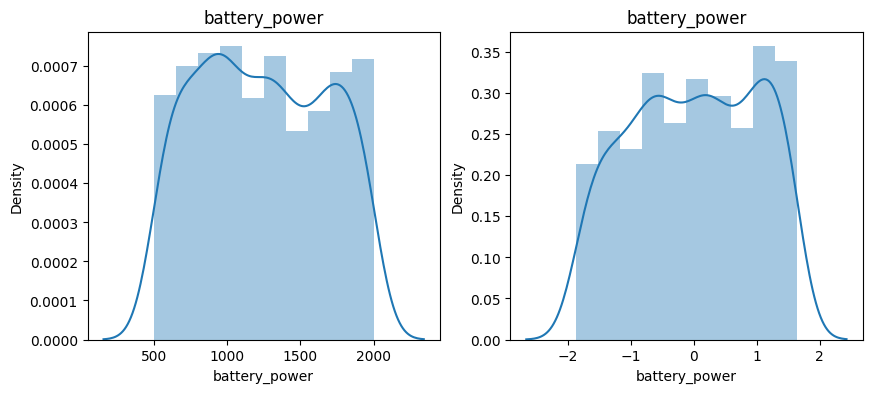

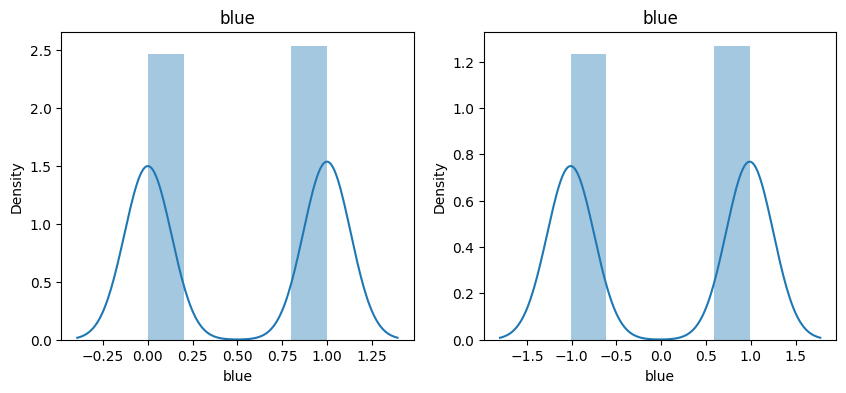

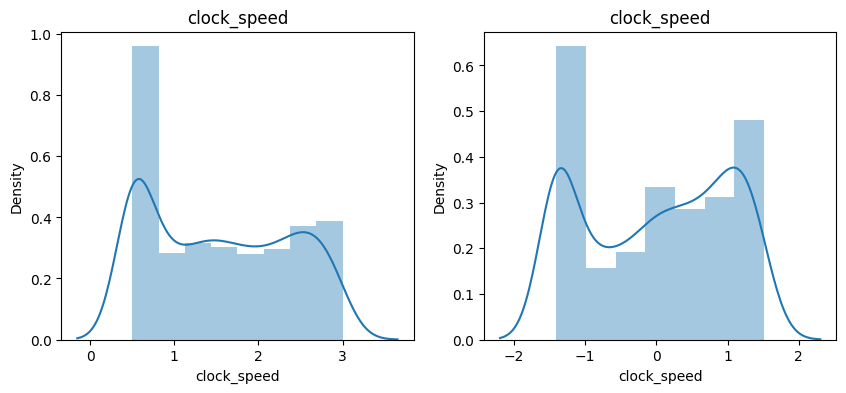

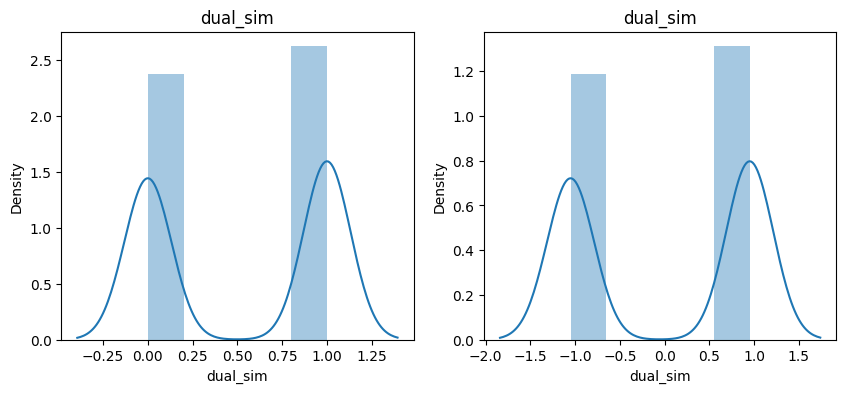

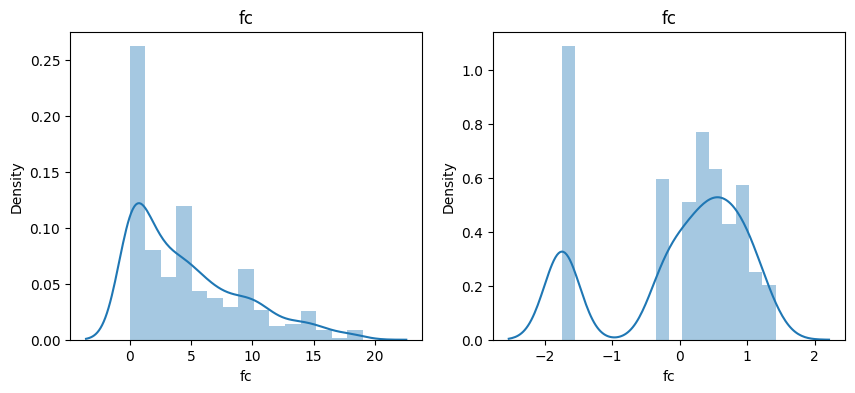

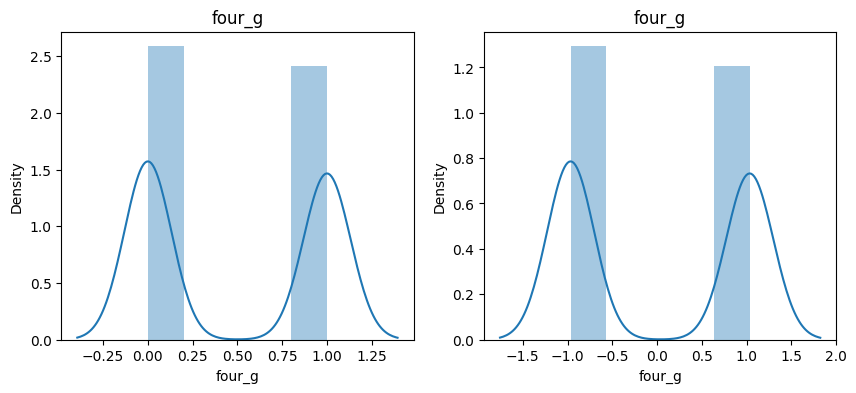

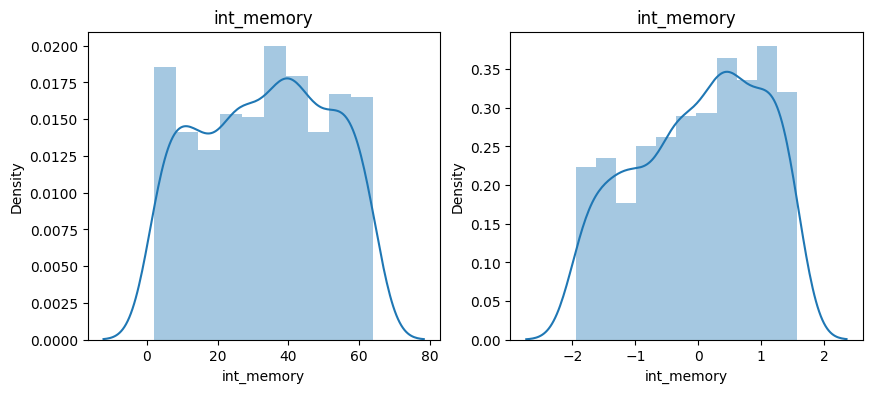

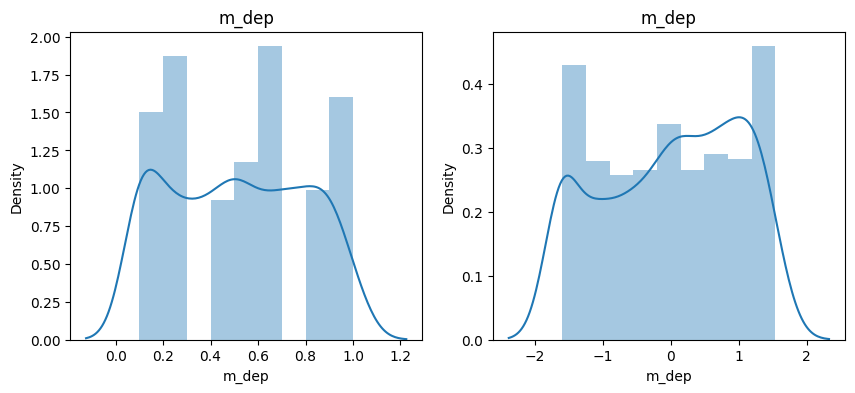

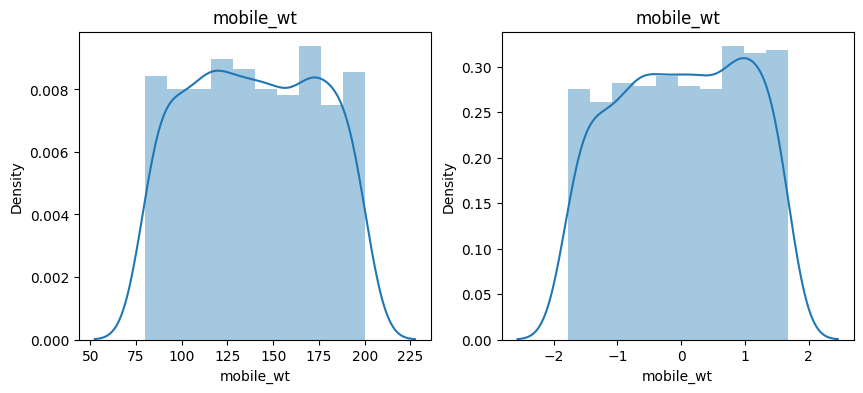

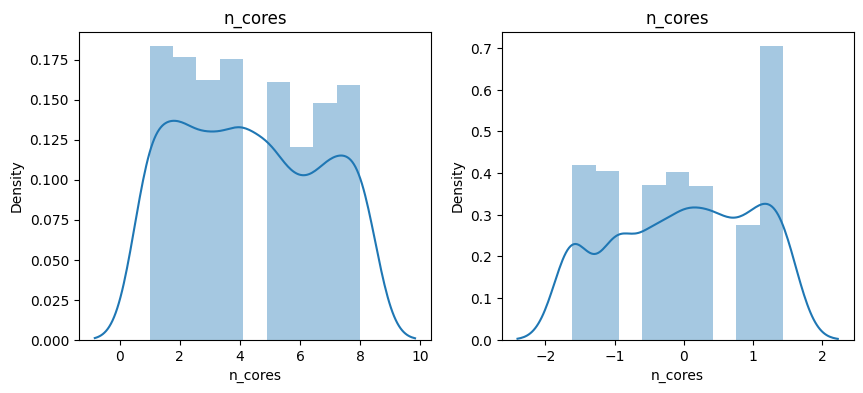

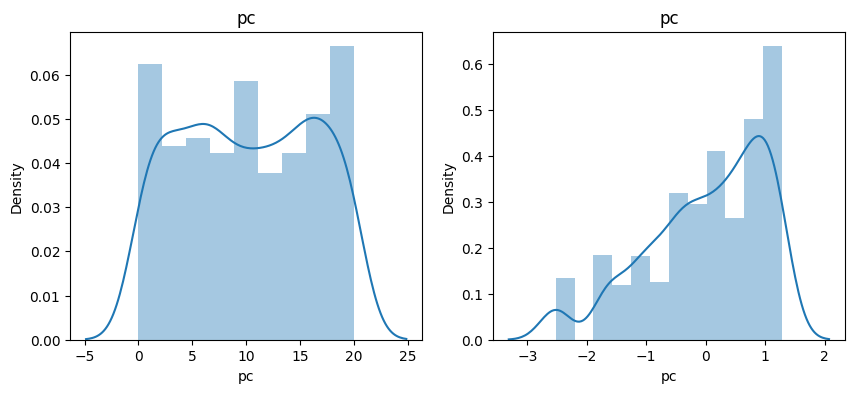

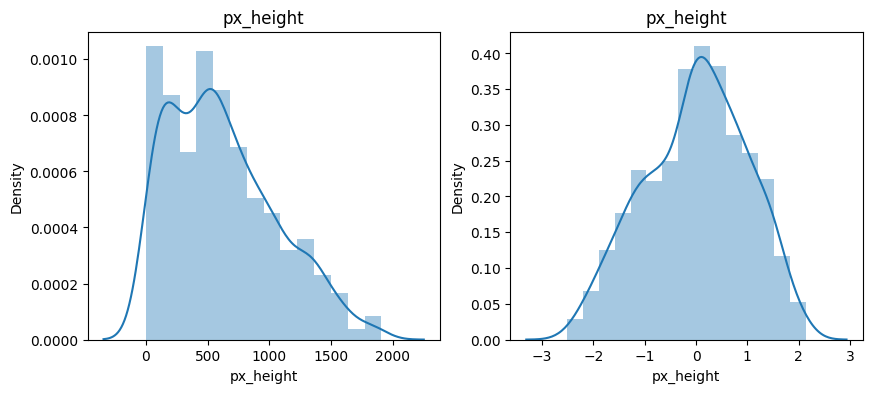

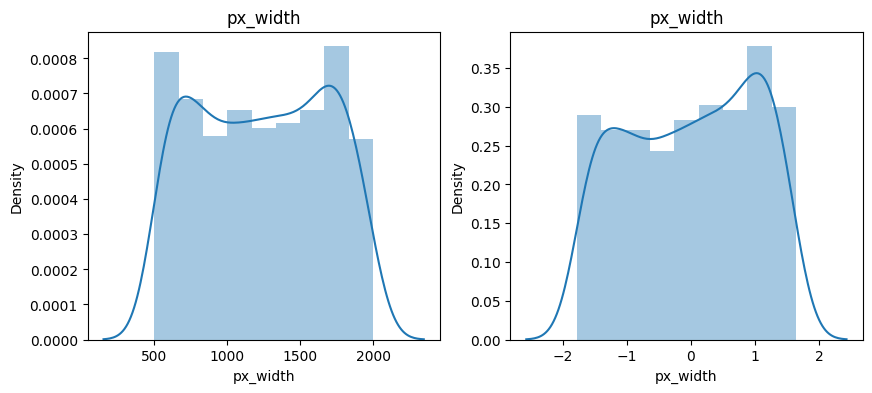

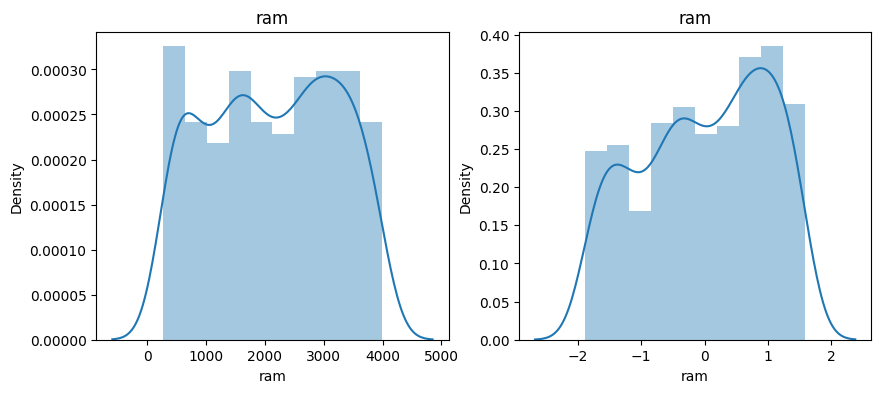

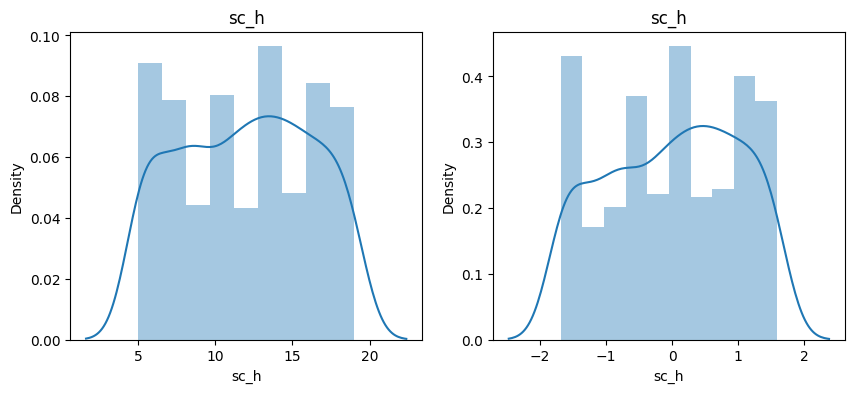

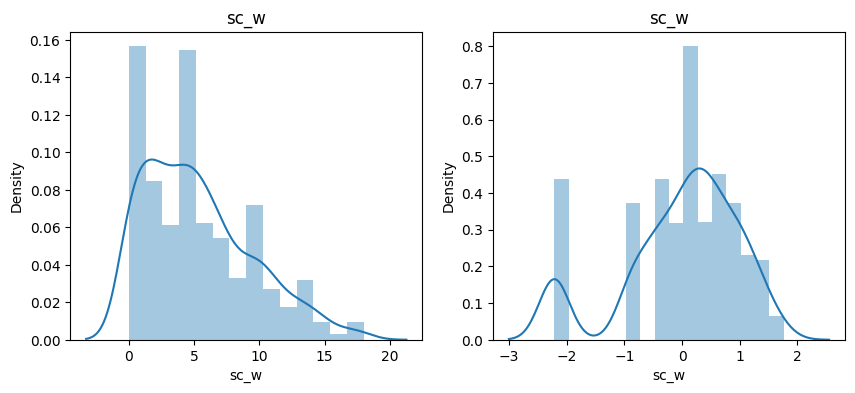

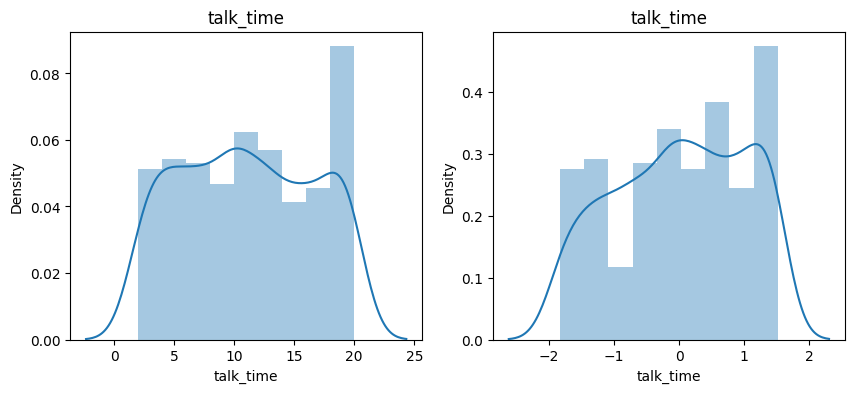

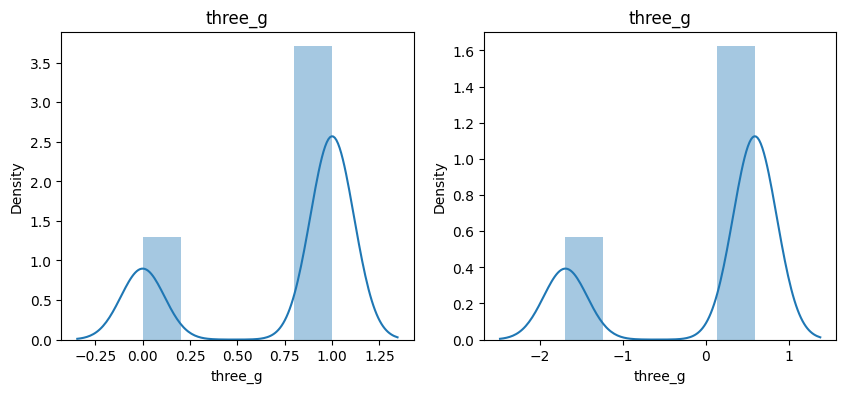

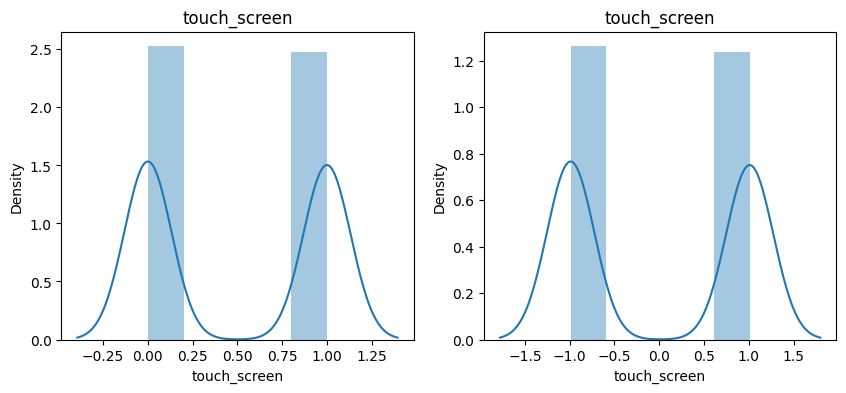

In [31]:
for col in X_train.keys():
  plt.figure(figsize=(10,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_trans_df[col])
  plt.title(col)
plt.show()

In [121]:
pt1 = PowerTransformer()
X_train_trans1 = pt1.fit_transform(X_train)
X_test_trans1 = pt1.transform(X_test)

In [122]:
X_train_trans_df1 = pd.DataFrame(X_train_trans1,columns=X_train.keys())
X_test_trans_df1 = pd.DataFrame(X_test_trans1,columns=X_train.keys())

In [123]:
lr.fit(X_train_trans_df1,y_train)
rft.fit(X_train_trans_df1,y_train)
dt.fit(X_train_trans_df1,y_train)
knn.fit(X_train_trans_df1,y_train)

KNeighborsClassifier()

In [124]:
print('Accuracy lr :',cross_val_score(lr,X_test_trans_df1,y_test).mean())
print('Accuracy rft :',cross_val_score(rft,X_test_trans_df1,y_test).mean())
print('Accuracy dt :',cross_val_score(dt,X_test_trans_df1,y_test).mean())
print('Accuracy knn :',cross_val_score(knn,X_test_trans_df1,y_test).mean())

Accuracy lr : 0.585
Accuracy rft : 0.535
Accuracy dt : 0.5599999999999999
Accuracy knn : 0.4600000000000001


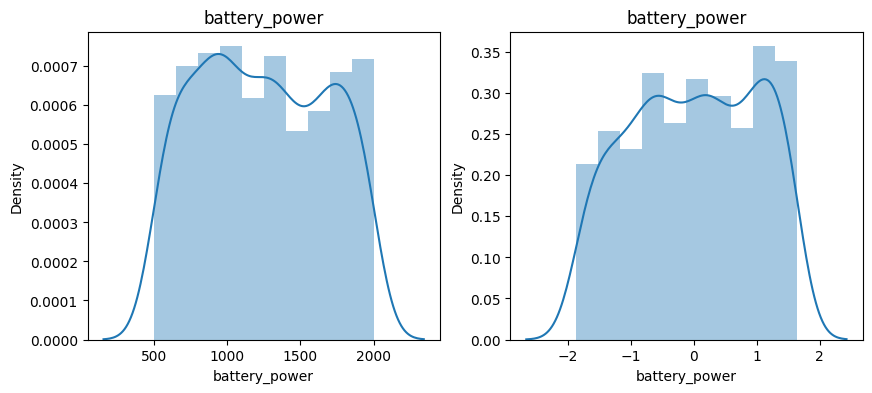

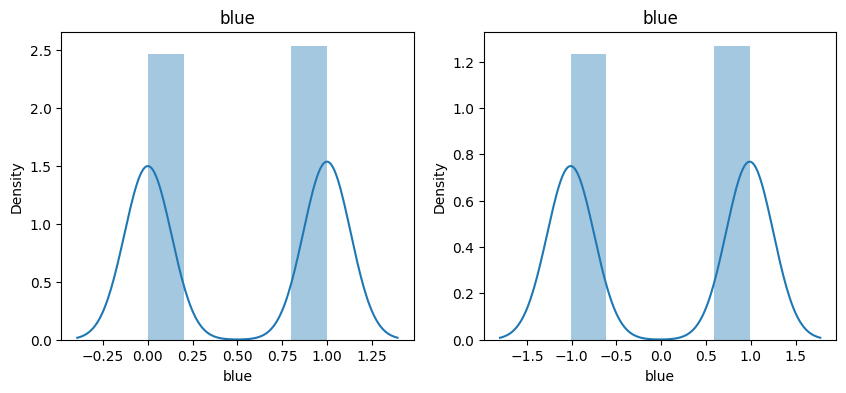

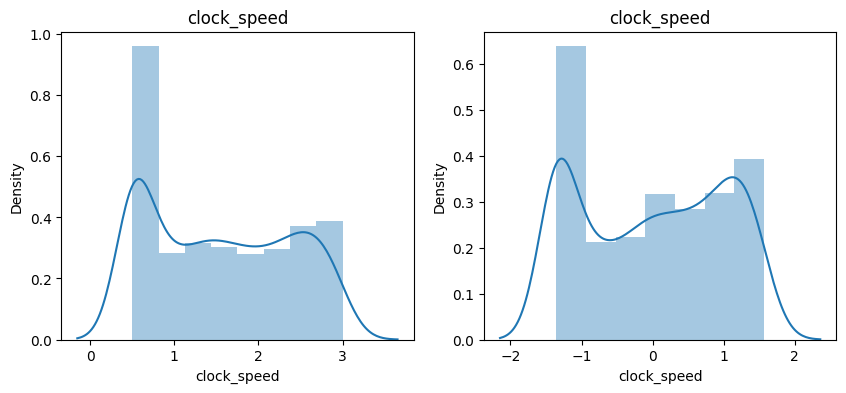

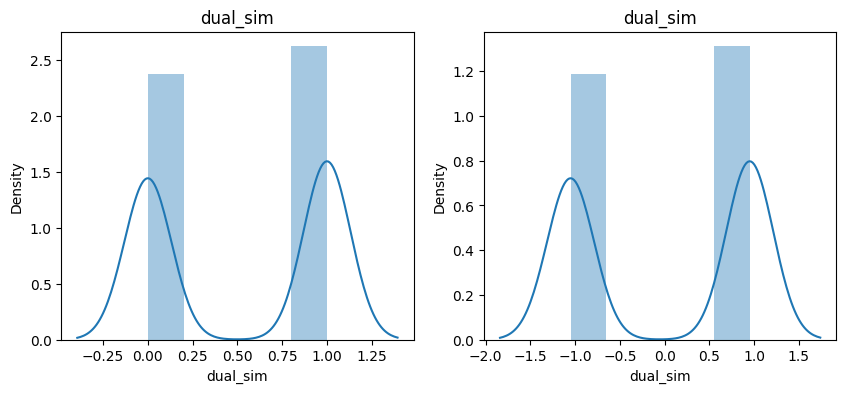

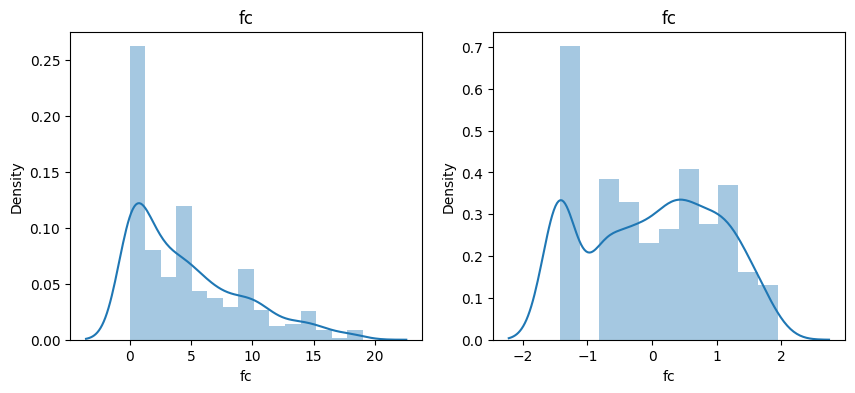

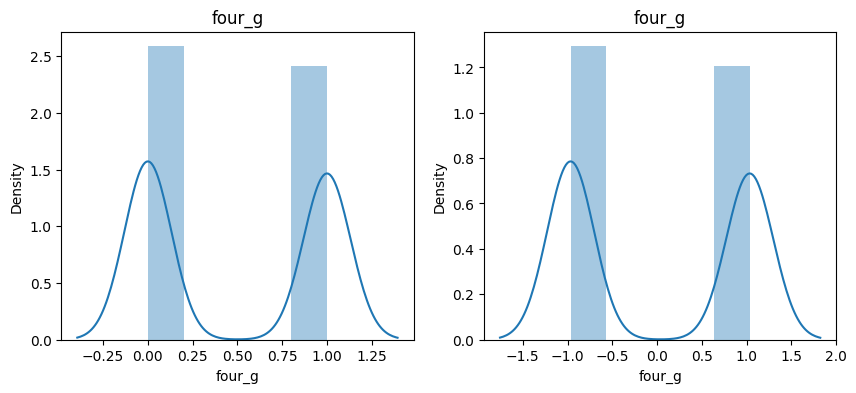

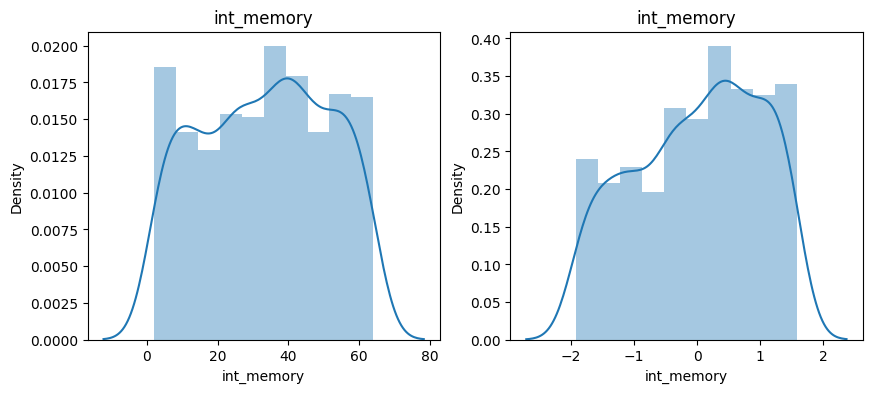

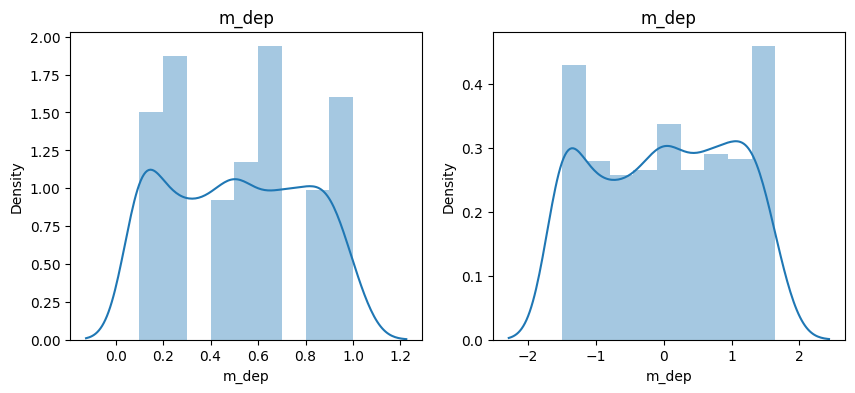

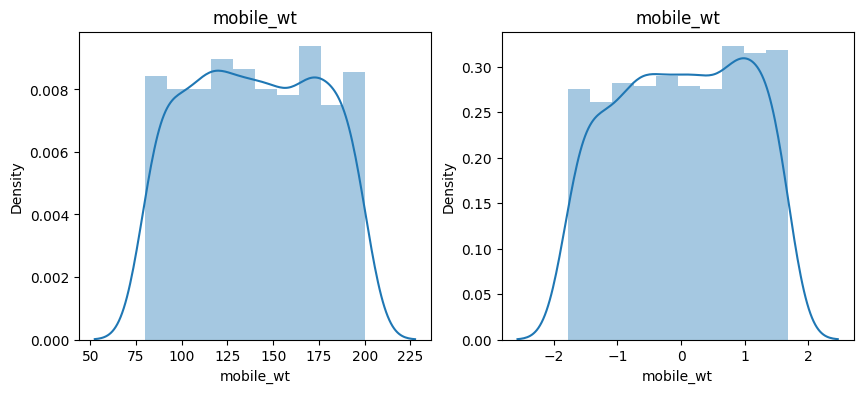

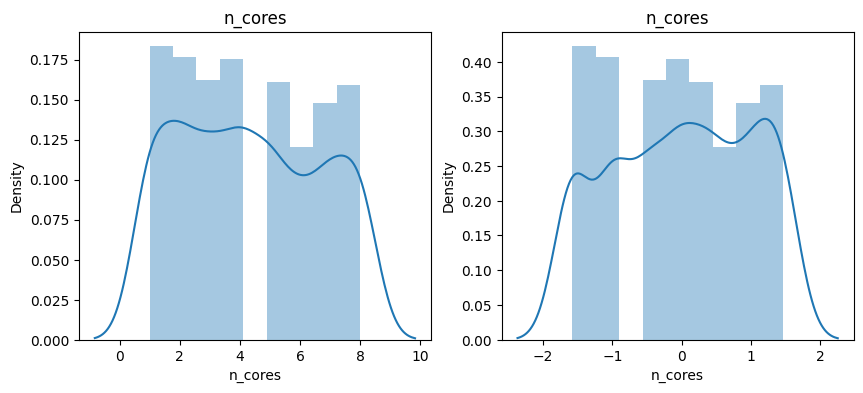

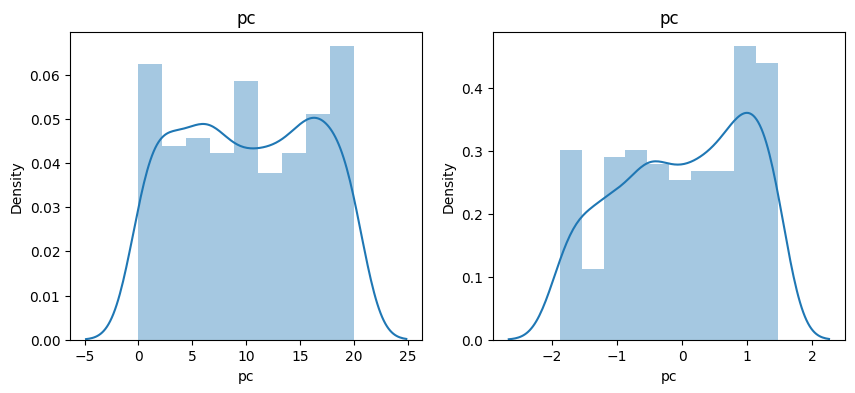

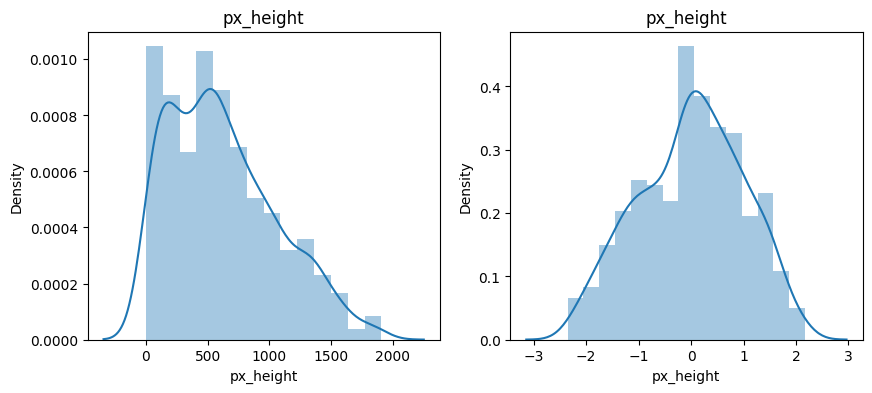

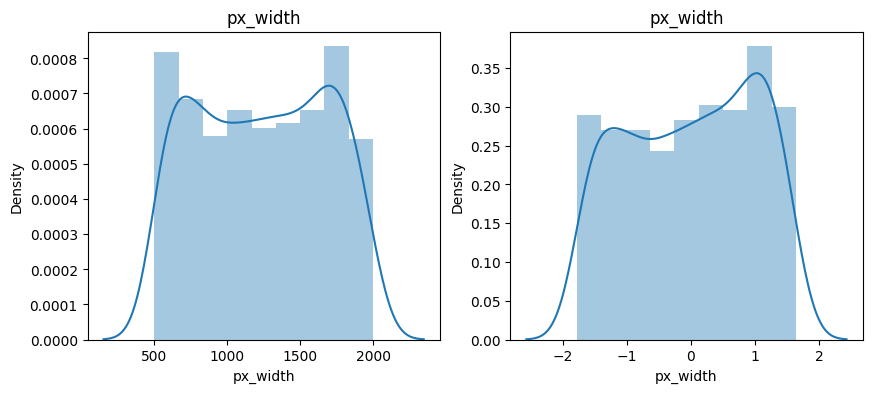

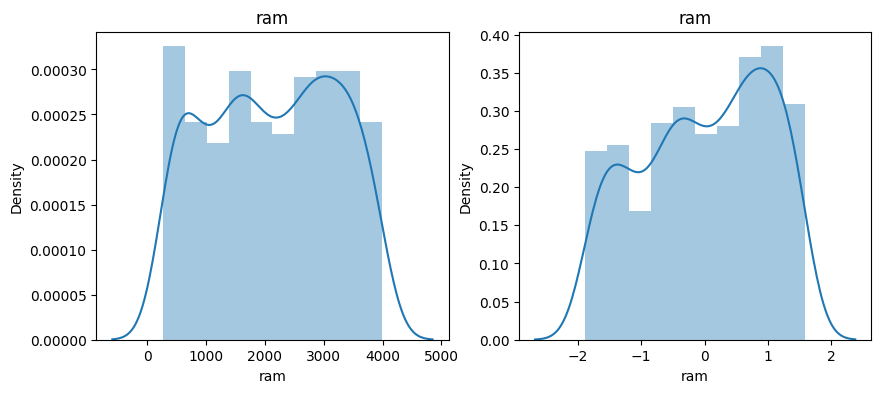

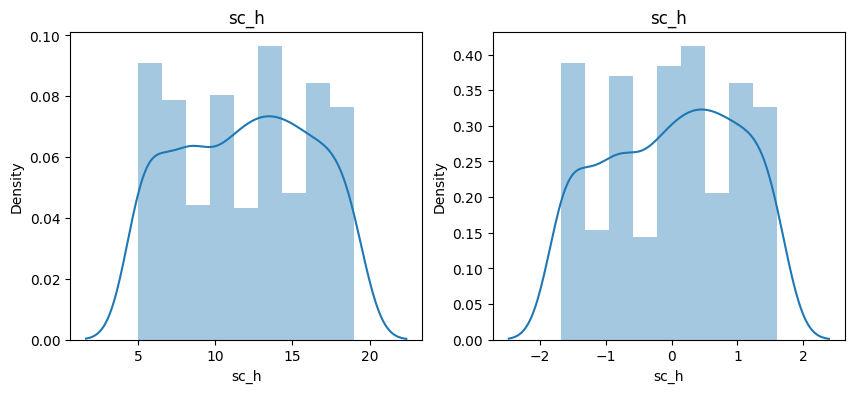

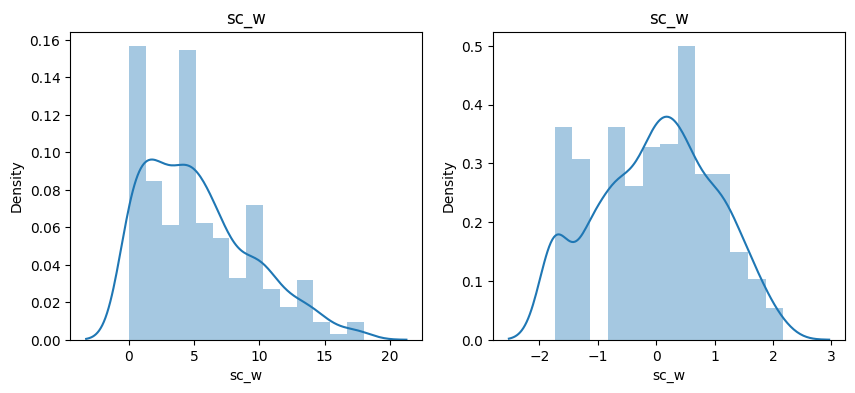

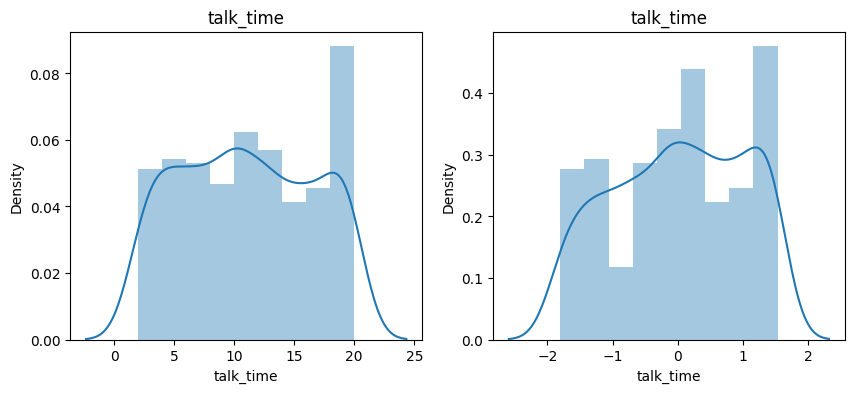

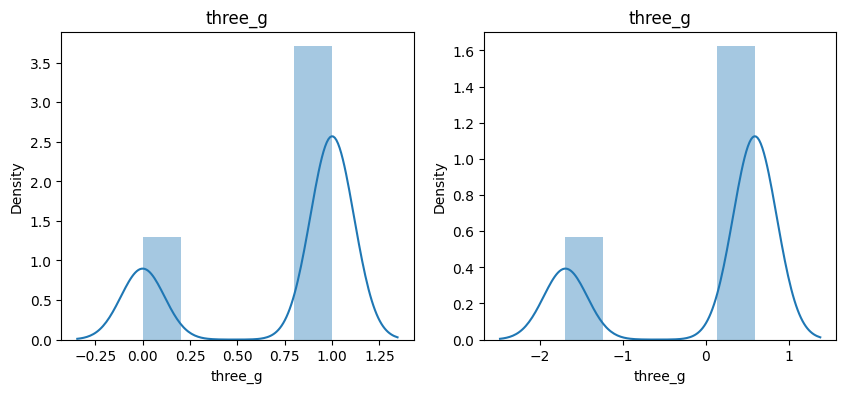

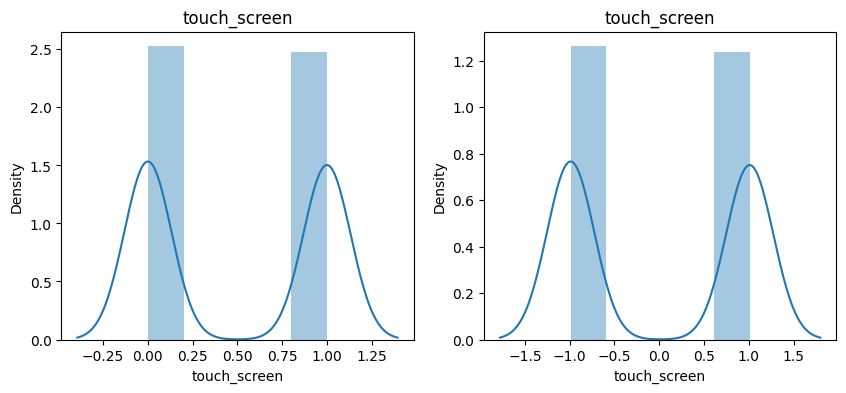

In [36]:
for col in X_train.keys():
  plt.figure(figsize=(10,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_trans_df1[col])
  plt.title(col)
plt.show()